# Comparison of topic models for different length of documents

To evaluate the influence of document length on the topic model results, the same corpus has been divided into documents of different length and trained using gensims LDA model. The parameters for the training runs are
* 80 topics
* automatic re-evaluation of alpha and eta values
* 2000 iterations with 5 passes over the corpus
* Tokenization using mmseg with a dictionary of frequently used terms of Classical Chinese (ca 3600 entries of 2 or more characters) and the character frequencies of the Kanseki Repository

## The following lengths have been used:

* Variable length of documents, each document is a paragraph from the original text.  The average length is about 256 tokens.  Label for this model is '000'

* Documents with average length of 25 tokens, label '025'
* Documents with average length of 100 tokens, label '100'
* Documents with average length of 500 tokens, label '500'
* Documents with average length of 1000 tokens, label '999'

## Evaluation points

1. Topic term table
2. Distribution of alpha values
3. Cooccurrence of tokens in the top 20 topic terms
4. Topics for term
5. Document by similarity


In [1]:
from IPython.core.display import display, HTML
import ktm_analysis as ktm
import numpy as np
import matplotlib.pyplot as plt
target="doclength"
models = ktm.prepan(target)
display(HTML("<h1>1. Topic term table</h1>"))
display(HTML("<p>Topic terms of all models, arranged by descending alpha value</p>"))
display(HTML(ktm.topic_terms_table(models, html=True)))

23,0.0362,書 郎 侍 部 尚 同 門 戸 吏 罷,26,0.0615,都 西 東 留 鎭 守 川 判 營 統,64,0.0298,攻 師 忠 等 義 救 撃 戰 賊 全,65,0.0165,世 出 餘 充 入 徳 公 道 東 戰,61,0.0239,國 公 今 陛 侍 等 文 部 朕 主
28,0.0282,平 同 薨 加 秋 侍 己丑 丁未 丙寅 己未,4,0.0612,衆 斬 撃 敗 戰 攻 餘 殺 走 追,33,0.0255,侍 郎 平 同 章 部 戸 尚 司 崔,26,0.0143,侍 同 郎 元 平 武 部 司 后 章,46,0.0238,南 入 復 令 出 武 數 道 從 都
46,0.0255,今 公 主 天 能 王 令 或 官 諫,29,0.0571,必 今 能 國 豈 罪 彼 心 功 知,18,0.0228,我 汝 出 入 馬 從 今 公 日 見,21,0.0142,平 朝 西 侍 國 同 門 皇 等 忠,71,0.0225,河 東 入 衆 光 懷 西 今 道 出
27,0.0246,正 春 朔 夏 食 日 號 甲申 仙芝 是歳,9,0.0547,陛 諫 卿 朕 賞 論 用 今 議 知,21,0.0226,河 東 陽 克 守 南 討 復 鎭 詔,64,0.0142,南 復 都 用 賊 駢 東 衆 師 巣,36,0.0141,入 宗 知 甫 用 請 南 公 日 奏
35,0.0241,城 戰 撃 衆 攻 出 守 士 敗 數,12,0.0515,南 乙 己 亥 丑 丁 巳 疾 酉 癸,42,0.0224,今 國 陛 欲 能 家 必 復 已 恐,11,0.0140,賊 入 衆 南 馬 日 東 戰 吐 武,59,0.0138,光 子 賊 河 儀 馬 明 南 思 朝
16,0.0235,章 學 士 翰林 同 乙亥 經 希烈 博 時,56,0.0506,宗 弟 敬 友 兄 殷 族 振 歳 室,31,0.0220,今 必 能 國 功 陛 生 彼 亂 難,19,0.0137,全 忠 建 朱 用 克 密 師 攻 楊,68,0.0136,全 忠 攻 朱 密 師 南 楊 建 從
26,0.0230,車 駕 南詔 乙未 泚 乙丑 思明 乙巳 庚戌 京師,24,0.0499,甲 申 壬 戊 庚 丙 戌 寅 午 車,44,0.0213,全 忠 彦 朱 密 汴 範 關 用 晉,0,0.0137,突 厥 利 吐 部 可 汗 都 國 道,37,0.0131,后 武 思 忠 同 皇 侍 之 郎 等
6,0.0224,都 全忠 朱全忠 督 丁卯 鎭 護 大梁 潞州 兗,28,0.0497,河 克 陽 東 晉 北 佐 清 洛 滅,63,0.0210,錢 給 湖 緡 神 用 税 田 物 支,24,0.0134,后 奏 承 宗 皇 元 侍 同 明 今,42,0.0126,世 徳 民 建 充 元 管 總 秦 道
49,0.0219,餘 民 年 數 州 募 縣 給 戸 多,30,0.0495,忠 全 難 義 請 用 再 處 復 國,16,0.0208,戰 賊 敗 衆 餘 浙 江 數 死 追,68,0.0130,武 陛 國 今 日 欲 復 知 能 朝,56,0.0125,全 忠 用 克 朱 東 建 河 貞 刺
65,0.0218,陛下 朕 今 安 知 心 能 天 豈 卿,45,0.0488,平 同 章 盧 加 康 柳 璨 賦 充,25,0.0206,昭 昌 忠 晟 宗 朱 楊 宣 章 密,67,0.0130,山 祿 忠 國 日 守 甫 知 林 出,48,0.0118,等 都 部 長 突 道 餘 府 厥 護
12,0.0217,城 攻 救 圍 守 引 撃 全忠 朱全忠 敗,39,0.0463,卯 汴 未 華 辛 丁 癸 湖 龍 幸,36,0.0199,陛 朕 卿 諫 今 日 忌 欲 知 嘗,43,0.0130,道 南 奏 仙 入 都 請 平 詔 公,13,0.0118,朝 馬 入 元 從 義 稹 延 河 諫


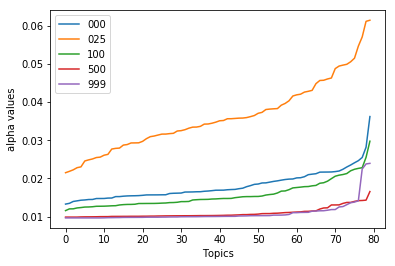

In [2]:
display(HTML("<h1>2. Distribution of alpha values</h1>"))
for m in models:
    lda=m[0]
    alpha=np.sort(lda.alpha)
    plt.plot(alpha)
plt.ylabel('alpha values')
plt.xlabel('Topics')
plt.legend([m[5] for m in models], loc='upper left')
plt.show()

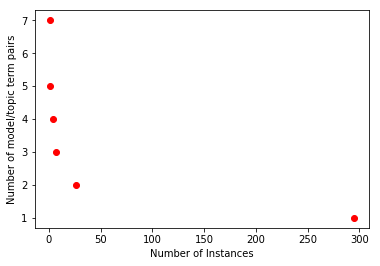

In [3]:
num_words = 20
display(HTML("<h1>3. Cooccurrence of tokens in the top %d topic terms</h1>" % (num_words)))
co=ktm.tab_co_list(ktm.get_tt_co(models, num_words=num_words))
plt.plot(co[1], co[0], 'ro')
plt.ylabel('Number of model/topic term pairs')
plt.xlabel('Number of Instances')
plt.show()

In [4]:
term= u"平"
display(HTML("<h1>4. Topics for term %s</h1>" % (term)))
ktm.topics_for_term(models, term)

[('000', [(28, 0.26555411540544782)]),
 ('025', [(45, 0.2334188469033861)]),
 ('100',
  [(21, 0.010069053767745102),
   (25, 0.011183468433270026),
   (33, 0.04030330818279048),
   (46, 0.013175973031918932),
   (48, 0.012066832842804348)]),
 ('500', []),
 ('999', [(17, 0.012300924400807815)])]

In [5]:
res=ktm.get_simdocs(models, 3)
display(HTML("<h1>5. Document by similarity</h1>"))
display(HTML("<p>%s</p>" % ("<p>\n".join(ktm.print_simdocs(res, html=True)))))